In [2]:
import numpy as np
import math
l1=[]
l2=[]
#Create data
l1.append([.75,.10])
l1.append([.85,.80])
l1.append([.85,.95])
l1.append([.15,.10])
l1.append([.05,.25])
l1.append([.05,.50])
l1.append([.85,.25])
arr_train_x=np.array(l1)
l2.append(-1)
l2.append(-1)
l2.append(1)
l2.append(-1)
l2.append(1)
l2.append(1)
l2.append(-1)
arr_train_y=np.array(l2)
#print(arr_train_x[0])

[ 0.75  0.1 ]


In [56]:
#Perceptron Algorithm
import matplotlib.pyplot as plt

def perceptron(epochs):
    weights = np.array(np.zeros(shape=(1,2)))
    length=len(arr_train_x)
    #print(length)
    acc=[]
    x=[]
    acc_test=[]
    x_test=[]
    c=0
    e=0
    acc_test.append(0)
    x_test.append(0)
    acc.append(0)
    x.append(0)
    ct=0
    while e<epochs:
        flag=1
        #print(e)
        i=0
        while i<length:
            c=c+1
            #print(c)
            #print np.vdot(trainset[0],weights[0])
            if arr_train_y[i]*(np.vdot(arr_train_x[i],weights))<=0 :
                flag=0
                weights=weights+np.array((arr_train_y[i]*arr_train_x[i]))
                ct=ct+1
            i=i+1
        #print(weights)
        if flag==1:
            print("Perceptron Converged after epoch number: "+str(e+1))
            break
        k=0
        count=0
        while k<length:
            if arr_train_y[k]*(np.vdot(arr_train_x[k],weights))<=0 :
                count=count+1
            k=k+1
        acc.append((length-count)/length)
        x.append(e+1)
        e=e+1
    print(weights)
    lx=[]
    ly=[]
    lxb=[]
    lyb=[]
    rx=[]
    ry=[]
    sx=[]
    sy=[]
    for x in arr_train_x:
        lx.append(x[0])
        ly.append(x[1])
    plt.scatter(lx,ly)
    t=0
    d=0.0
    lx.sort()
    while d<=1.0:
        rx.append(d)
        ry.append(math.sqrt(d))
        sx.append(d)
        sy.append(math.sqrt(2)*d)
        d=d+0.1
    plt.plot(rx,ry)
    lxb.append(0)
    lxb.append(1)
    lyb.append(0)
    lyb.append((-1*weights[0][0])/weights[0][1])
    plt.plot(lxb,lyb)
    sx.append(0)
    sx.append(1)
    sy.append(0)
    sy.append(1)
    plt.plot(sx,sy)
    plt.show()
    print("Number of updates: "+str(ct))
    print("End of run")

Perceptron Converged after epoch number: 3
[[-1.05  1.1 ]]


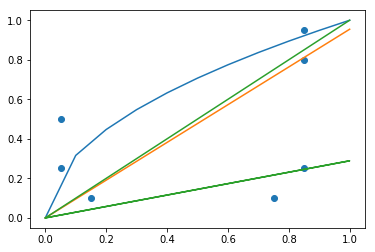

Number of updates: 7
End of run


In [57]:
perceptron(10)

In [54]:
#Decision Tree
def decisiontree():
    #sort acc to a feature
    #l1.append(l2)
    #print(l1)
    #arr_train=np.array(l3)
    #print(arr_train)
    #x=arr_train_x[np.lexsort(np.fliplr(arr_train_x).T)]
    #print(x)
    
    #choosing the threshold
    i=0
    mini=len(arr_train_x)+1
    mini_x2=len(arr_train_x)+1
    threshold=1.0
    threshold_x2=1.0
    while i<len(arr_train_x)-1:
        t=(arr_train_x[i][0]+arr_train_x[i+1][0])/2
        t2=(arr_train_x[i][1]+arr_train_x[i+1][1])/2
        j=0
        count=0
        count2=0
        while j<len(arr_train_x):
            if(arr_train_x[j][0]<=t):
                if(arr_train_y[j]==-1):
                    count=count+1
            else:
                if(arr_train_y[j]==1):
                    count=count+1
            j=j+1
        
        if(count<mini):
            mini=count
            threshold=t
        j=0
        while j<len(arr_train_x):    
            if(arr_train_x[j][1]<=t2 and arr_train_x[j][0]>threshold):
                if(arr_train_y[j]==-1):
                    count2=count2+1
            else:
                if(arr_train_y[j]==1):
                    count2=count2+1
            j=j+1
        if(count2<mini_x2):
            mini_x2=count2
            threshold_x2=t2
        i=i+1
    print(threshold)
    
    lx=[]
    ly=[]
    thx=[]
    thy=[]
    thx2=[]
    thy2=[]
    for x in arr_train_x:
        lx.append(x[0])
        ly.append(x[1])
    plt.scatter(lx,ly)
    i=0.0
    while i<=1.0:
        thx.append(threshold)
        thy.append(i)
        if i>=0.1:
            thy2.append(0.875)
            thx2.append(i)
        i=i+0.1
    plt.plot(thx,thy)
    plt.plot(thx2,thy2)
    thx=[]
    thy=[]
    thx2=[]
    thy2=[]
    i=0.01
    while i<=1.0:
        thx.append(0.12)
        thy.append(i)
        if i>=0.12:
            thy2.append(0.9)
            thx2.append(i)
        i=i+0.01
    plt.plot(thx,thy)
    plt.plot(thx2,thy2)
    d=0.0
    rx=[]
    ry=[]
    while d<=1.0:
        rx.append(d)
        ry.append(math.sqrt(d))
        d=d+0.1
    plt.plot(rx,ry)
    plt.show()
            
        
    

0.1


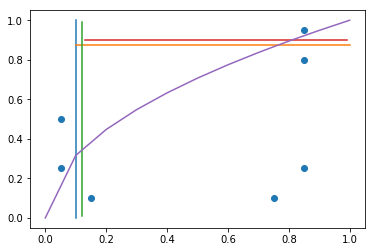

In [55]:
decisiontree()

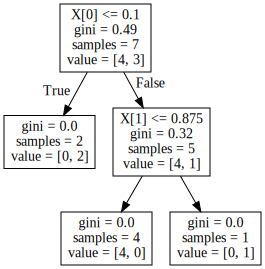

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

tree=DecisionTreeClassifier(max_depth=2)
tree.fit(arr_train_x,arr_train_y)
dot=export_graphviz(tree,out_file=None)
graph=graphviz.Source(dot)
graph


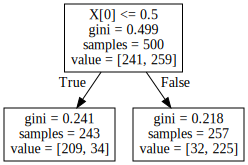

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import graphviz
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

train_data = pd.read_csv("C:\\Users\\Vishnutej\\Desktop\\ML 2018\\train.csv")
test_data = pd.read_csv("C:\\Users\\Vishnutej\\Desktop\\ML 2018\\test.csv")

best_tree=DecisionTreeClassifier(max_depth=1)
best_tree.fit(train_data.iloc[:,0:5],train_data['Y'])
export_graphviz(best_tree,out_file="C:\\Users\\Vishnutej\\Desktop\\ML 2018\\tree2.dot")
sur_tree=DecisionTreeClassifier(max_depth=1)
sur_tree.fit(train_data.iloc[:,1:5],train_data['Y'])
dot=tree.export_graphviz(best_tree,out_file=None)
graph=graphviz.Source(dot)
graph
#print(best_tree.tree_.feature)
#export_graphviz(tree,out_file="C:\\Users\\Vishnutej\\Desktop\\ML 2018\\tree3.dot")

#print(data.head())

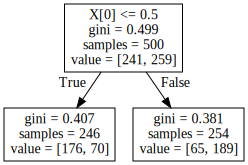

In [59]:
sur_dot=tree.export_graphviz(sur_tree,out_file=None)
sur_graph=graphviz.Source(sur_dot)
sur_graph

In [61]:
p=[]
p.append(241/500)
p.append(209/243)
p.append(32/257)
total_sum=2*p[0]*(1-p[0])-(((243/500)*2*p[1]*(1-p[1]))+((257/500)*2*p[2]*(1-p[2])))
print(total_sum)
q=[]
q.append(241/500)
q.append(176/246)
q.append(65/254)
total_sum=2*p[0]*(1-p[0])-(((243/500)*2*p[1]*(1-p[1]))+((257/500)*2*p[2]*(1-p[2])))+\
2*q[0]*(1-q[0])-(((243/500)*2*q[1]*(1-q[1]))+((257/500)*2*q[2]*(1-q[2])))
print(total_sum)

0.2703185497750236
0.3760387553073895


In [65]:
predictions=best_tree.predict(test_data.iloc[:,0:5])
#print(predictions)
x=0
error=0.0
while x<100:
    error=error+((predictions[x]-test_data['Y'][x])**2)
    x=x+1
print("Error= "+str(error*0.01))
predictions=sur_tree.predict(test_data.iloc[:,1:5])
#print(predictions)
x=0
error=0.0
while x<100:
    error=error+((predictions[x]-test_data['Y'][x])**2)
    x=x+1
print("Error= "+str
      (error*0.01))

Error= 0.1
Error= 0.27


In [64]:
import random
lists=train_data.values.tolist()
#print(len(lists))
train=random.sample(lists,400)
train_df = pd.DataFrame(train)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
a = [0] * 5
m=[0]*5
total=[0.0]*5
#print(a)
rf1=RandomForestClassifier(n_estimators=1000,max_depth=1,max_features=4,warm_start=True,oob_score=True)
rf1.fit(train_df.iloc[:,0:5],train_df[5])
oob_error = 1 - rf1.oob_score_
print("OOB Error: "+str(oob_error))
for t in rf1.estimators_:
    #print(t.tree_.value)
    #print(t.tree_.value[1][0][1])
    temp=[]
    temp.append(t.tree_.value[0][0][0]/400)
    temp.append(t.tree_.value[1][0][0]/(t.tree_.value[1][0][0]+t.tree_.value[1][0][1]))
    temp.append(t.tree_.value[2][0][0]/(t.tree_.value[2][0][0]+t.tree_.value[2][0][1]))
    #print(temp)
    m[t.tree_.feature[0]]=m[t.tree_.feature[0]]+1
    total[t.tree_.feature[0]]=total[t.tree_.feature[0]]+(2*temp[0]*(1-temp[0])-\
    ((((t.tree_.value[1][0][0]+t.tree_.value[1][0][1])/400)*2*temp[1]*(1-temp[1]))+\
    (((t.tree_.value[2][0][0]+t.tree_.value[2][0][1])/400)*2*temp[2]*(1-temp[2]))))
    #print(total)
    a[t.tree_.feature[0]]=a[t.tree_.feature[0]]+1
    dot=tree.export_graphviz(t,out_file=None)
    graph=graphviz.Source(dot)
if(m[0]!=0):    
    print(total[0]/m[0])
else:
    print("0")
if(m[1]!=0): 
    print(total[1]/m[1])
else:
    print("0")
if(m[2]!=0):
    print(total[2]/m[2])
else:
    print("0")
if(m[3]!=0):
    print(total[3]/m[3])
else:
    print("0")
if(m[4]!=0):
    print(total[4]/m[4])
else:
    print("0")
    
print(m)
eclf1 = VotingClassifier(estimators=[('rf', rf1)], voting='hard')
eclf1 = eclf1.fit(train_df.iloc[:,0:5],train_df[5])
predictions=rf1.predict(test_data.iloc[:,0:5])
maj_predictions=eclf1.predict(test_data.iloc[:,0:5])
print(predictions)
print(maj_predictions)
x=0
error=0.0
maj_error=0
while x<100:
    error=error+((predictions[x]-test_data['Y'][x])**2)
    if(maj_predictions[x]!=test_data['Y'][x]):
        maj_error=maj_error+1
    x=x+1
print("MLSE Loss= "+str(error))
print("Majority 0-1 Loss= "+str(maj_error))

OOB Error: 0.135
0.267225192766
0.0921922914601
0
0
0
[799, 201, 0, 0, 0]
[0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
[0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
MLSE Loss= 10.0
Majority 0-1 Loss= 10


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
arr = [0] * 5
m=[0]*5
total=[0.0]*5
#print(a)
rf2=RandomForestClassifier(n_estimators=1000,max_depth=1,max_features=1,oob_score=True,warm_start=True)
rf2.fit(train_df.iloc[:,0:5],train_df[5])
#print(oob_error)
for t in rf2.estimators_:
    #print(t.tree_.feature[0])
    x=0
    mx=0
    feature=-1
    while(x<5):
        p1=0
        p2=0
        if(x!=t.tree_.feature[0]):
            for d in train_df:
                if(train_df[d][t.tree_.feature[0]]==0 and train_df[d][x]==0):
                    p1=p1+1
                elif(train_df[d][t.tree_.feature[0]]==1 and train_df[d][x]==1):
                    p2=p2+1
            sm=p1+p2
            if(mx<sm):
                mx=sm
                feature=x
        x=x+1
    temp=[]
    temp.append(t.tree_.value[0][0][0]/400)
    temp.append(t.tree_.value[1][0][0]/(t.tree_.value[1][0][0]+t.tree_.value[1][0][1]))
    temp.append(t.tree_.value[2][0][0]/(t.tree_.value[2][0][0]+t.tree_.value[2][0][1]))
    #print(temp)
    m[t.tree_.feature[0]]=m[t.tree_.feature[0]]+1
    total[t.tree_.feature[0]]=total[t.tree_.feature[0]]+(2*temp[0]*(1-temp[0])-\
    ((((t.tree_.value[1][0][0]+t.tree_.value[1][0][1])/400)*2*temp[1]*(1-temp[1]))+\
    (((t.tree_.value[2][0][0]+t.tree_.value[2][0][1])/400)*2*temp[2]*(1-temp[2]))))
    arr[feature]=arr[feature]+1
print(arr)
        

[0, 378, 411, 211, 0]


In [80]:
import random
lists=train_data.values.tolist()
#print(len(lists))
#q=0.4,0.5,0.6,0.7,0.8
q=0.8
n=int(q*500)
train=random.sample(lists,n)
train_df = pd.DataFrame(train)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
a = [0] * 5
m=[0]*5
total=[0.0]*5
#print(a)
rf1=RandomForestClassifier(n_estimators=1000,max_depth=1,max_features=2,oob_score=True,warm_start=True)
rf1.fit(train_df.iloc[:,0:5],train_df[5])
oob_error=1-rf1.oob_score_
print("OOB Error: "+str(oob_error))
for t in rf1.estimators_:
    #print(t.tree_.value)
    #print(t.tree_.value[1][0][1])
    temp=[]
    temp.append(t.tree_.value[0][0][0]/n)
    temp.append(t.tree_.value[1][0][0]/(t.tree_.value[1][0][0]+t.tree_.value[1][0][1]))
    temp.append(t.tree_.value[2][0][0]/(t.tree_.value[2][0][0]+t.tree_.value[2][0][1]))
    #print(temp)
    m[t.tree_.feature[0]]=m[t.tree_.feature[0]]+1
    total[t.tree_.feature[0]]=total[t.tree_.feature[0]]+(2*temp[0]*(1-temp[0])-\
    ((((t.tree_.value[1][0][0]+t.tree_.value[1][0][1])/n)*2*temp[1]*(1-temp[1]))+\
    (((t.tree_.value[2][0][0]+t.tree_.value[2][0][1])/n)*2*temp[2]*(1-temp[2]))))
    #print(total)
    a[t.tree_.feature[0]]=a[t.tree_.feature[0]]+1
    dot=tree.export_graphviz(t,out_file=None)
    graph=graphviz.Source(dot)
if(m[0]!=0):    
    print(total[0]/m[0])
else:
    print("0")
if(m[1]!=0): 
    print(total[1]/m[1])
else:
    print("0")
if(m[2]!=0):
    print(total[2]/m[2])
else:
    print("0")
if(m[3]!=0):
    print(total[3]/m[3])
else:
    print("0")
if(m[4]!=0):
    print(total[4]/m[4])
else:
    print("0")
    
print(m)
eclf1 = VotingClassifier(estimators=[('rf', rf1)], voting='hard')
eclf1 = eclf1.fit(train_df.iloc[:,0:5],train_df[5])
predictions=rf1.predict(test_data.iloc[:,0:5])
maj_predictions=eclf1.predict(test_data.iloc[:,0:5])
print(predictions)
print(maj_predictions)
x=0
error=0.0
maj_error=0
while x<100:
    error=error+((predictions[x]-test_data['Y'][x])**2)
    if(maj_predictions[x]!=test_data['Y'][x]):
        maj_error=maj_error+1
    x=x+1
print("MLSE Loss= "+str(error))
print("Majority 0-1 Loss= "+str(maj_error))
#print(test_data['Y'])
graph
weighted_avg_and_std(total,m)

OOB Error: 0.1325
0.267640694158
0.115236282995
0.00199260209062
0.00299557731162
0.00213508842233
[410, 309, 90, 114, 77]
[0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
[0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0]
MLSE Loss= 10.0
Majority 0-1 Loss= 10
56.0610057636
46.75350115216907


In [79]:
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    print(average)
    print(math.sqrt(variance))

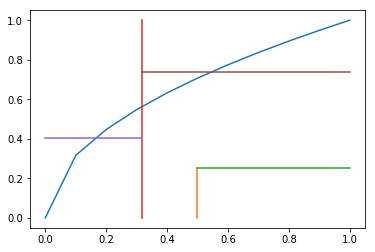

In [73]:
d=0.0
rx=[]
ry=[]
while d<=1.0:
    rx.append(d)
    ry.append(math.sqrt(d))
    d=d+0.1
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(0.5)
ry.append(0)
ry.append(0.25)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(1)
ry.append(0.25)
ry.append(0.25)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.317)
rx.append(0.317)
ry.append(0)
ry.append(1)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0)
rx.append(0.317)
ry.append(0.404)
ry.append(0.404)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.317)
rx.append(1)
ry.append(0.739)
ry.append(0.739)
plt.plot(rx,ry)

plt.show()

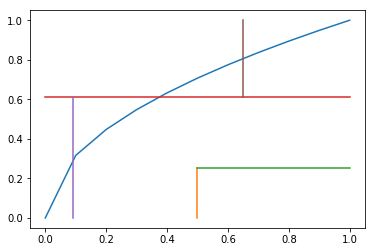

In [75]:
d=0.0
rx=[]
ry=[]
while d<=1.0:
    rx.append(d)
    ry.append(math.sqrt(d))
    d=d+0.1
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(0.5)
ry.append(0)
ry.append(0.25)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(1)
ry.append(0.25)
ry.append(0.25)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0)
rx.append(1)
ry.append(0.61)
ry.append(0.61)
plt.plot(rx,ry)
rx=[]
ry=[]
ry.append(0)
ry.append(0.61)
rx.append(0.09)
rx.append(0.09)
plt.plot(rx,ry)
rx=[]
ry=[]
ry.append(0.61)
ry.append(1)
rx.append(0.65)
rx.append(0.65)
plt.plot(rx,ry)

plt.show()

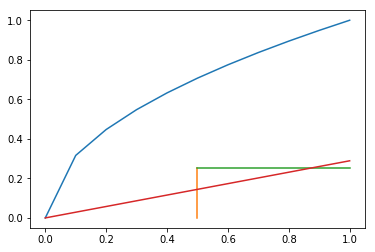

In [74]:
d=0.0
rx=[]
ry=[]
while d<=1.0:
    rx.append(d)
    ry.append(math.sqrt(d))
    d=d+0.1
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(0.5)
ry.append(0)
ry.append(0.25)
plt.plot(rx,ry)
rx=[]
ry=[]
rx.append(0.5)
rx.append(1)
ry.append(0.25)
ry.append(0.25)
plt.plot(rx,ry)

d=0.0
sx=[]
sy=[]
x3=[]
y3=[]
while d<=1.0:
    sx.append(d)
    sy.append(math.sqrt(2)*d)
    x3.append(d)
    y3.append(d*0.289)
    d=d+0.1
#plt.plot(sx,sy)
plt.plot(x3,y3)
plt.show()